## US rūmų rinkimų eksploracija

In [1]:
import pandas as pd

# Nurodykite failo kelią su Atstovų Rūmų rinkimų duomenimis
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\house.csv"

# Užkrauname duomenis
house_data = pd.read_csv(failo_kelias)

# Peržiūrime pirmas kelias eilutes
print(house_data.head())

# Patikriname stulpelius ir jų tipą
print(house_data.info())

# Patikriname, ar yra trūkstamų reikšmių
print(house_data.isnull().sum())


   year    state state_po  state_fips  state_cen  state_ic    office  \
0  1976  ALABAMA       AL           1         63        41  US HOUSE   
1  1976  ALABAMA       AL           1         63        41  US HOUSE   
2  1976  ALABAMA       AL           1         63        41  US HOUSE   
3  1976  ALABAMA       AL           1         63        41  US HOUSE   
4  1976  ALABAMA       AL           1         63        41  US HOUSE   

   district stage runoff  special                   candidate       party  \
0         1   GEN  False    False              BILL DAVENPORT    DEMOCRAT   
1         1   GEN  False    False                JACK EDWARDS  REPUBLICAN   
2         1   GEN  False    False                     WRITEIN         NaN   
3         2   GEN  False    False             J CAROLE KEAHEY    DEMOCRAT   
4         2   GEN  False    False  WILLIAM L "BILL" DICKINSON  REPUBLICAN   

   writein   mode  candidatevotes  totalvotes  unofficial   version  \
0    False  TOTAL           58906

aprasomoji statistika

In [2]:
# Aprašomoji statistika kandidatų balsų ir bendro balsavimo
print(house_data[["candidatevotes", "totalvotes"]].describe())

# Grupavimas pagal metus ir kandidatą, kad pamatytume rinkėjų aktyvumą
yearly_votes = house_data.groupby("year")["candidatevotes"].sum()
print(yearly_votes)


       candidatevotes    totalvotes
count    3.245200e+04  3.245200e+04
mean     6.682502e+04  2.151654e+05
std      6.509136e+04  8.227252e+04
min     -1.000000e+00 -1.000000e+00
25%      4.324000e+03  1.622660e+05
50%      5.732850e+04  2.069830e+05
75%      1.121438e+05  2.633860e+05
max      1.165136e+06  2.656104e+06
year
1976     74259171
1978     54584215
1980     77873913
1982     63880858
1984     82421874
1986     59765411
1988     81682171
1990     62354865
1992     97281410
1994     70494661
1996     90745365
1998     66602923
2000     98799965
2002     74891212
2004    113191293
2006     81210047
2008    122586298
2010     86795460
2012    122345021
2014     78812774
2016    129833250
2018    113688301
2020    154061632
2022    110443389
Name: candidatevotes, dtype: int64


In [3]:
# Nustatome laimėtoją kiekvienoje apylinkėje
house_data["winner"] = house_data.groupby(["year", "state", "district"])["candidatevotes"].transform(max) == house_data["candidatevotes"]
house_data["winner"] = house_data["winner"].astype(int)

# Pateikiame tik laimėjusius kandidatus
winners = house_data[house_data["winner"] == 1]
print(winners[["year", "state", "district", "candidate", "party", "candidatevotes"]])


       year         state  district                   candidate       party  \
1      1976       ALABAMA         1                JACK EDWARDS  REPUBLICAN   
4      1976       ALABAMA         2  WILLIAM L "BILL" DICKINSON  REPUBLICAN   
6      1976       ALABAMA         3                BILL NICHOLS    DEMOCRAT   
10     1976       ALABAMA         4                  TOM BEVILL    DEMOCRAT   
12     1976       ALABAMA         5             RONNIE G FLIPPO    DEMOCRAT   
...     ...           ...       ...                         ...         ...   
32428  2022      DELAWARE         0        LISA BLUNT ROCHESTER    DEMOCRAT   
32431  2022  NORTH DAKOTA         0             KELLY ARMSTRONG  REPUBLICAN   
32434  2022  SOUTH DAKOTA         0               DUSTY JOHNSON  REPUBLICAN   
32437  2022       VERMONT         0                BECCA BALINT    DEMOCRAT   
32445  2022       WYOMING         0             HARRIET HAGEMAN  REPUBLICAN   

       candidatevotes  
1               98257  
4  

C:\Users\Paulius\AppData\Local\Temp\ipykernel_28232\1069901522.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  house_data['winner'] = house_data.groupby(['year', 'state', 'district'])['candidatevotes'].transform(max) == house_data['candidatevotes']


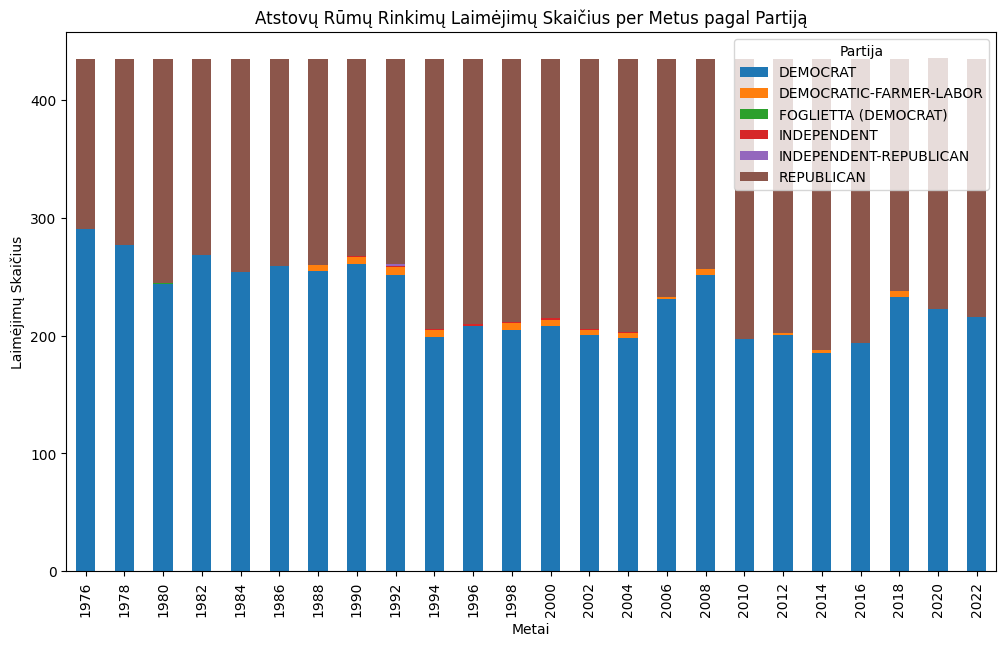

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grupavimas pagal metus ir partijas, norint matyti laimėjusių partijų pasiskirstymą
party_wins_per_year = winners.groupby(["year", "party"]).size().unstack()

# Braižome laimėtojų skaičiaus pagal partiją kaitą per metus
party_wins_per_year.plot(kind="bar", stacked=True, figsize=(12, 7))
plt.title("Atstovų Rūmų Rinkimų Laimėjimų Skaičius per Metus pagal Partiją")
plt.xlabel("Metai")
plt.ylabel("Laimėjimų Skaičius")
plt.legend(title="Partija")
plt.show()


In [5]:
# Sukuriame stulpelį, kuris identifikuoja laimėtoją kiekvienoje apygardoje
house_data["winner"] = house_data.groupby(["year", "state", "district"])["candidatevotes"].transform(max) == house_data["candidatevotes"]
house_data["winner"] = house_data["winner"].astype(int)

# Filtruojame tik laimėjusius kandidatus
winners = house_data[house_data["winner"] == 1]
print(winners[["year", "state", "district", "candidate", "party", "candidatevotes"]])


       year         state  district                   candidate       party  \
1      1976       ALABAMA         1                JACK EDWARDS  REPUBLICAN   
4      1976       ALABAMA         2  WILLIAM L "BILL" DICKINSON  REPUBLICAN   
6      1976       ALABAMA         3                BILL NICHOLS    DEMOCRAT   
10     1976       ALABAMA         4                  TOM BEVILL    DEMOCRAT   
12     1976       ALABAMA         5             RONNIE G FLIPPO    DEMOCRAT   
...     ...           ...       ...                         ...         ...   
32428  2022      DELAWARE         0        LISA BLUNT ROCHESTER    DEMOCRAT   
32431  2022  NORTH DAKOTA         0             KELLY ARMSTRONG  REPUBLICAN   
32434  2022  SOUTH DAKOTA         0               DUSTY JOHNSON  REPUBLICAN   
32437  2022       VERMONT         0                BECCA BALINT    DEMOCRAT   
32445  2022       WYOMING         0             HARRIET HAGEMAN  REPUBLICAN   

       candidatevotes  
1               98257  
4  

C:\Users\Paulius\AppData\Local\Temp\ipykernel_28232\3731061359.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  house_data['winner'] = house_data.groupby(['year', 'state', 'district'])['candidatevotes'].transform(max) == house_data['candidatevotes']


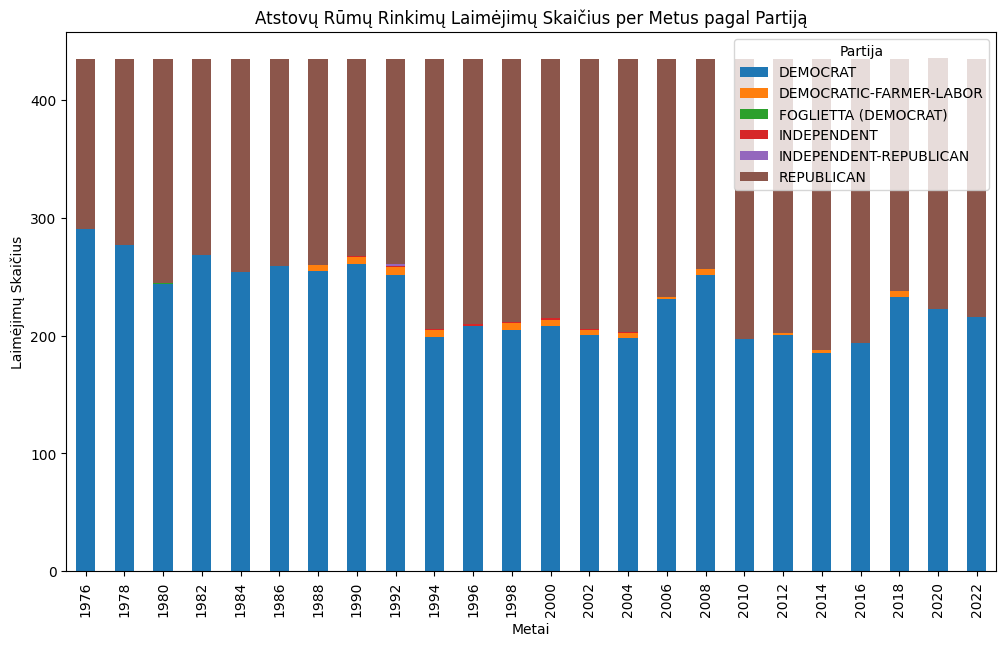

In [6]:
import matplotlib.pyplot as plt

# Grupavimas pagal metus ir partijas, norint matyti laimėjusių partijų pasiskirstymą
party_wins_per_year = winners.groupby(["year", "party"]).size().unstack()

# Braižome laimėtojų skaičiaus pagal partiją kaitą per metus
party_wins_per_year.plot(kind="bar", stacked=True, figsize=(12, 7))
plt.title("Atstovų Rūmų Rinkimų Laimėjimų Skaičius per Metus pagal Partiją")
plt.xlabel("Metai")
plt.ylabel("Laimėjimų Skaičius")
plt.legend(title="Partija")
plt.show()


In [10]:
import pandas as pd

# Nurodykite failo kelią su Atstovų Rūmų rinkimų duomenimis
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\house.csv"

# Užkrauname duomenis
house_data = pd.read_csv(failo_kelias)

# Peržiūrime pirmas kelias eilutes
print(house_data.head())

# Patikriname stulpelius ir jų tipą
print(house_data.info())


   year    state state_po  state_fips  state_cen  state_ic    office  \
0  1976  ALABAMA       AL           1         63        41  US HOUSE   
1  1976  ALABAMA       AL           1         63        41  US HOUSE   
2  1976  ALABAMA       AL           1         63        41  US HOUSE   
3  1976  ALABAMA       AL           1         63        41  US HOUSE   
4  1976  ALABAMA       AL           1         63        41  US HOUSE   

   district stage runoff  special                   candidate       party  \
0         1   GEN  False    False              BILL DAVENPORT    DEMOCRAT   
1         1   GEN  False    False                JACK EDWARDS  REPUBLICAN   
2         1   GEN  False    False                     WRITEIN         NaN   
3         2   GEN  False    False             J CAROLE KEAHEY    DEMOCRAT   
4         2   GEN  False    False  WILLIAM L "BILL" DICKINSON  REPUBLICAN   

   writein   mode  candidatevotes  totalvotes  unofficial   version  \
0    False  TOTAL           58906

In [ ]:
# Sukuriame "winner" stulpelį
house_data["winner"] = house_data.groupby(["year", "state", "district"])["candidatevotes"].transform(max) == house_data["candidatevotes"]
house_data["winner"] = house_data["winner"].astype(int)

# Patikrinkite, ar stulpelis egzistuoja
print(house_data.head())  # Įsitikinkite, kad yra "winner" stulpelis


   year    state state_po  state_fips  state_cen  state_ic    office  \
0  1976  ALABAMA       AL           1         63        41  US HOUSE   
1  1976  ALABAMA       AL           1         63        41  US HOUSE   
2  1976  ALABAMA       AL           1         63        41  US HOUSE   
3  1976  ALABAMA       AL           1         63        41  US HOUSE   
4  1976  ALABAMA       AL           1         63        41  US HOUSE   

   district stage runoff  ...                   candidate       party writein  \
0         1   GEN  False  ...              BILL DAVENPORT    DEMOCRAT   False   
1         1   GEN  False  ...                JACK EDWARDS  REPUBLICAN   False   
2         1   GEN  False  ...                     WRITEIN         NaN    True   
3         2   GEN  False  ...             J CAROLE KEAHEY    DEMOCRAT   False   
4         2   GEN  False  ...  WILLIAM L "BILL" DICKINSON  REPUBLICAN   False   

    mode candidatevotes  totalvotes  unofficial   version  fusion_ticket  \
0  T

C:\Users\Paulius\AppData\Local\Temp\ipykernel_28232\1055009956.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  house_data['winner'] = house_data.groupby(['year', 'state', 'district'])['candidatevotes'].transform(max) == house_data['candidatevotes']


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4410
           1       0.97      0.97      0.97      2081

    accuracy                           0.98      6491
   macro avg       0.98      0.98      0.98      6491
weighted avg       0.98      0.98      0.98      6491



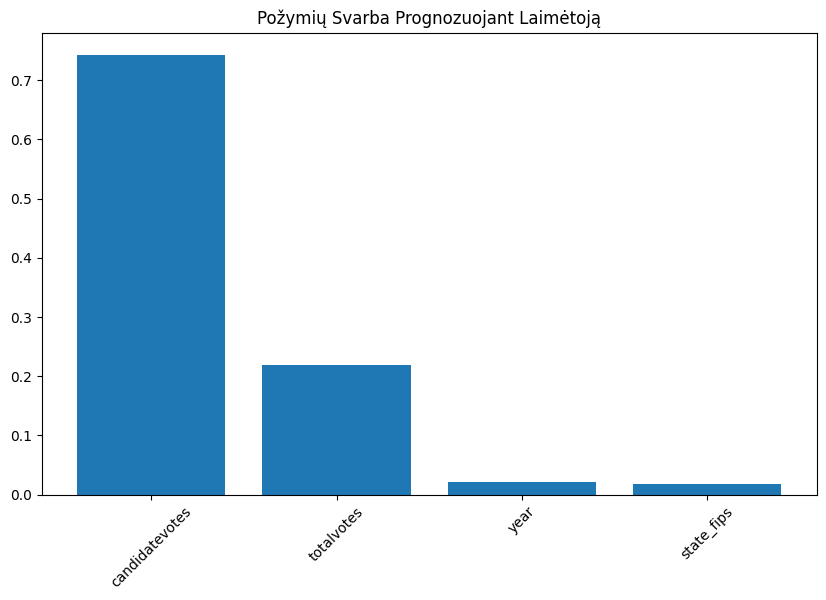

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Pasirenkame savybes ir tikslinę reikšmę
features = ["year", "state_fips", "candidatevotes", "totalvotes"]
X = house_data[features]
y = house_data["winner"]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treniruojame Random Forest modelį
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prognozuojame ir vertiname modelį
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Požymių svarbos braižymas
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Požymių Svarba Prognozuojant Laimėtoją")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.show()


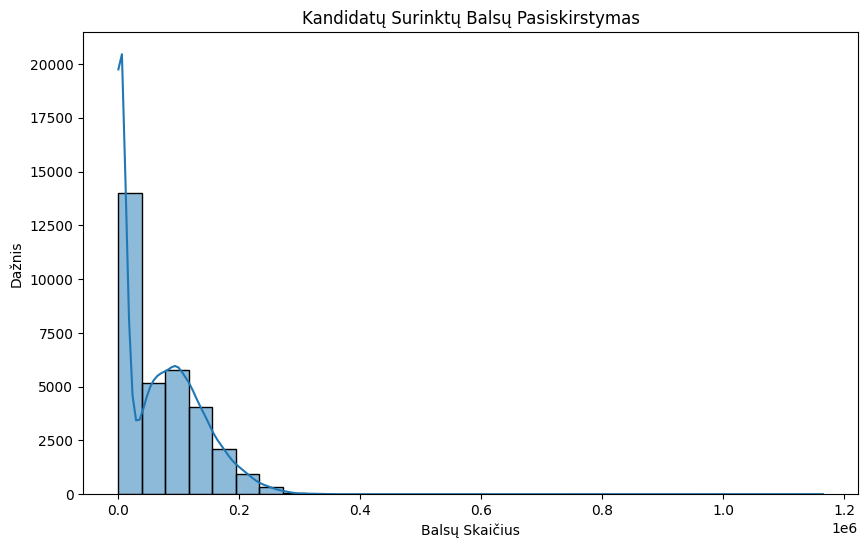

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(house_data["candidatevotes"], bins=30, kde=True)
plt.title("Kandidatų Surinktų Balsų Pasiskirstymas")
plt.xlabel("Balsų Skaičius")
plt.ylabel("Dažnis")
plt.show()


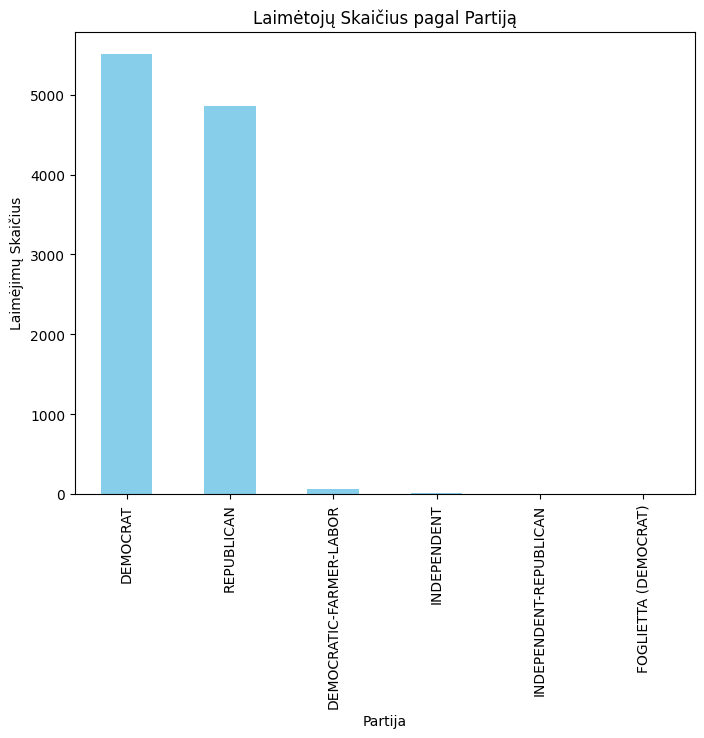

In [15]:
party_wins = winners["party"].value_counts()
plt.figure(figsize=(8, 6))
party_wins.plot(kind="bar", color="skyblue")
plt.title("Laimėtojų Skaičius pagal Partiją")
plt.xlabel("Partija")
plt.ylabel("Laimėjimų Skaičius")
plt.show()
